In [1]:
import os;os.getcwd()

'/home/dp/hdd2/gits/hms-handler'

In [2]:
from cn_correct import MultiCorrectionTool as MCT

/home/dp/hdd2/gits/hms-handler/cn_correct.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.parasite_axes import SubplotHost


In [3]:
import numpy as np;import pandas as pd

In [4]:
a=pd.Series([0,1,2,-3,3,-3])
(a<0).sum()

2

In [5]:
max_deg=5
l1_list=np.linspace(1,9,10)**2#for elastic-net
l1_list=list(1-l1_list/(max(l1_list)+1))
l2_alphas=list(np.logspace(-5,1.4,50))# for ridge
model_spec_list=[
    {f'lasso-{i}':{
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'max_poly_deg':i,'poly_search':False,
        'fit_intercept':False,'n_alphas':50
        } for i in range(1,max_deg+1)},

    {f'ridge-{i}':{
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'max_poly_deg':i,'poly_search':False,
        'fit_intercept':False,'alphas':l2_alphas
        } for i in range(1,max_deg+1)},

    {f'lin_reg-{i}':{
        'max_poly_deg':i,
        'poly_search':False,
        'fit_intercept':False
        } for i in range(1,max_deg+1)},

    {f'elastic_net-{i}':{
        'n_alpha':10,
        'l1_ratio':l1_list,#list(1-np.logspace(-2,-.03,7)),
        'inner_cv':{'n_repeats':2,'n_splits':10,'n_jobs':1},
        'max_poly_deg':i,'poly_search':False,'fit_intercept':False
        } for i in range(1,max_deg+1)},

    {f'gbr-{c}_{l}_{s}_{d}':{
        'kwargs':{
            'ccp_alpha':c,'learning_rate':l,
            'subsample':s,'max_depth':d
            }
        } for c in [0,0.05] for l in [0.025,.1] for s in [1,0.7] for d in [2,3]
    }
]

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
mct=MCT(model_specs=model_spec_list)


In [8]:
#mct.runCorrections() # not necessary if it's been run before and correction_results_df exists

In [9]:
mct.buildCorrectionResultsDF()

In [10]:
mct.selectCorrections()

In [11]:
mct.setCorrectionSelectionAccuracy()

In [12]:
mct.setSortOrder()

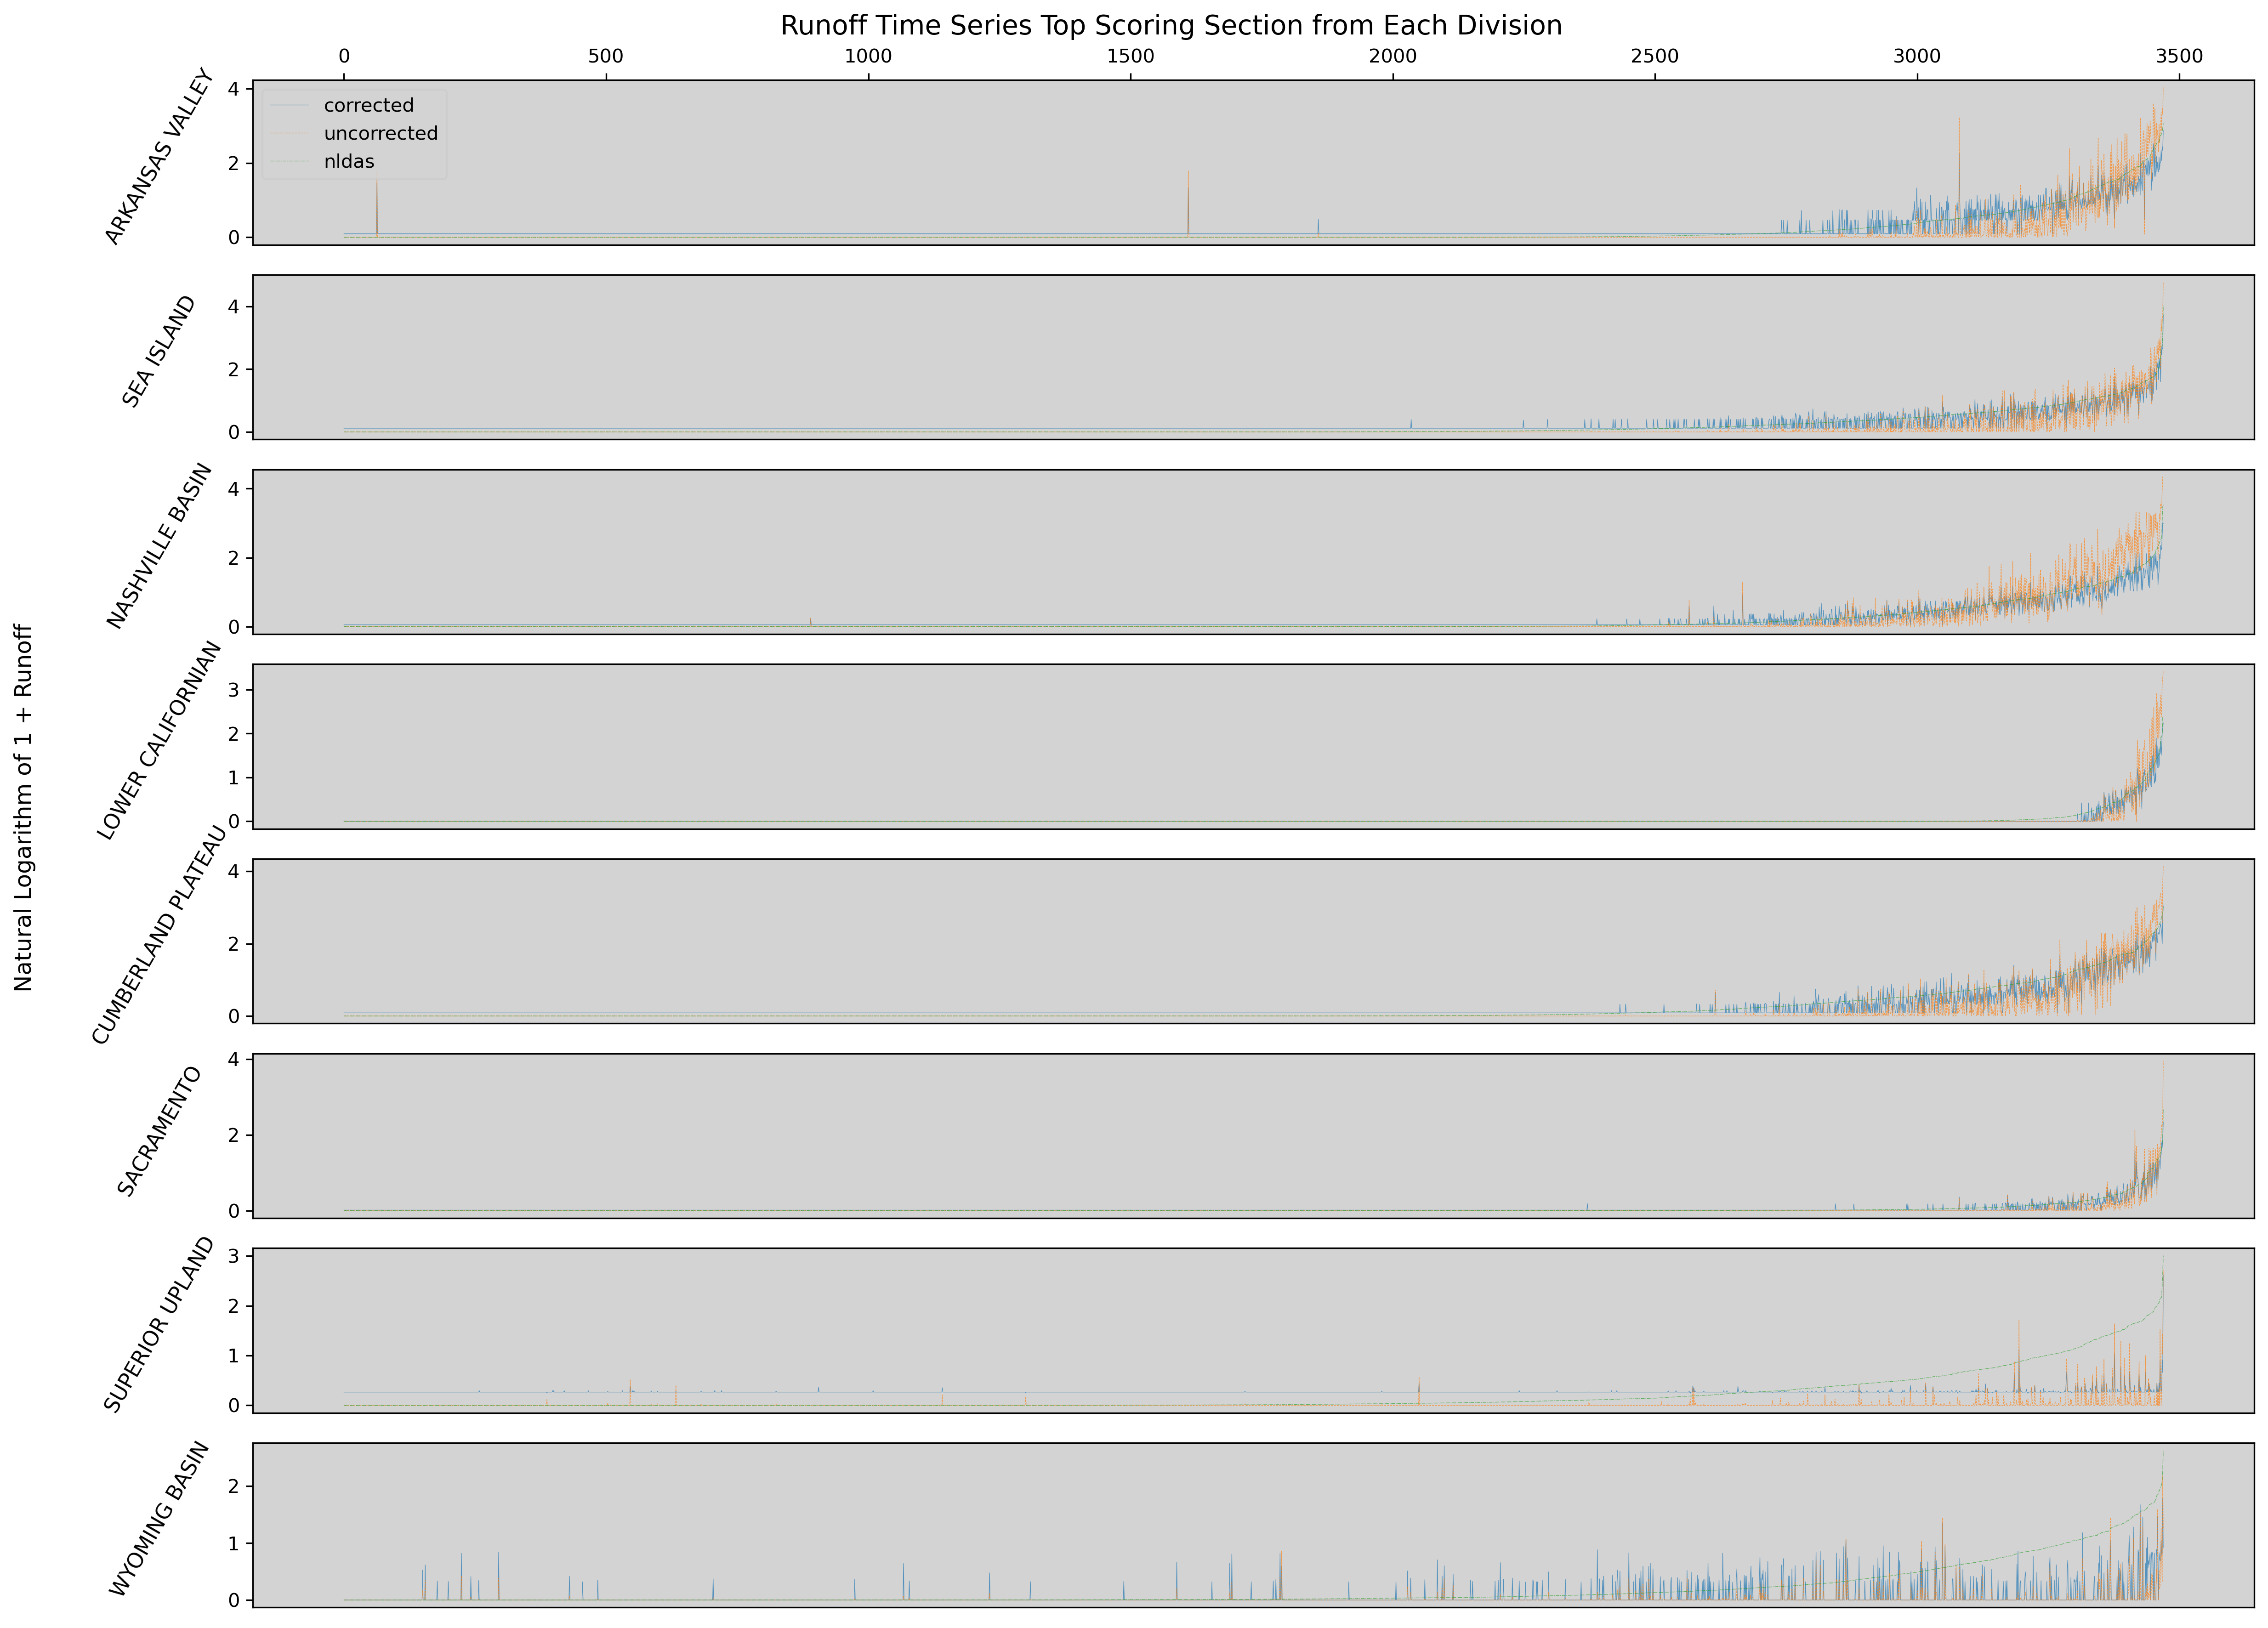

In [13]:
mct.plotCorrectionRunoffComparison(sort=True)

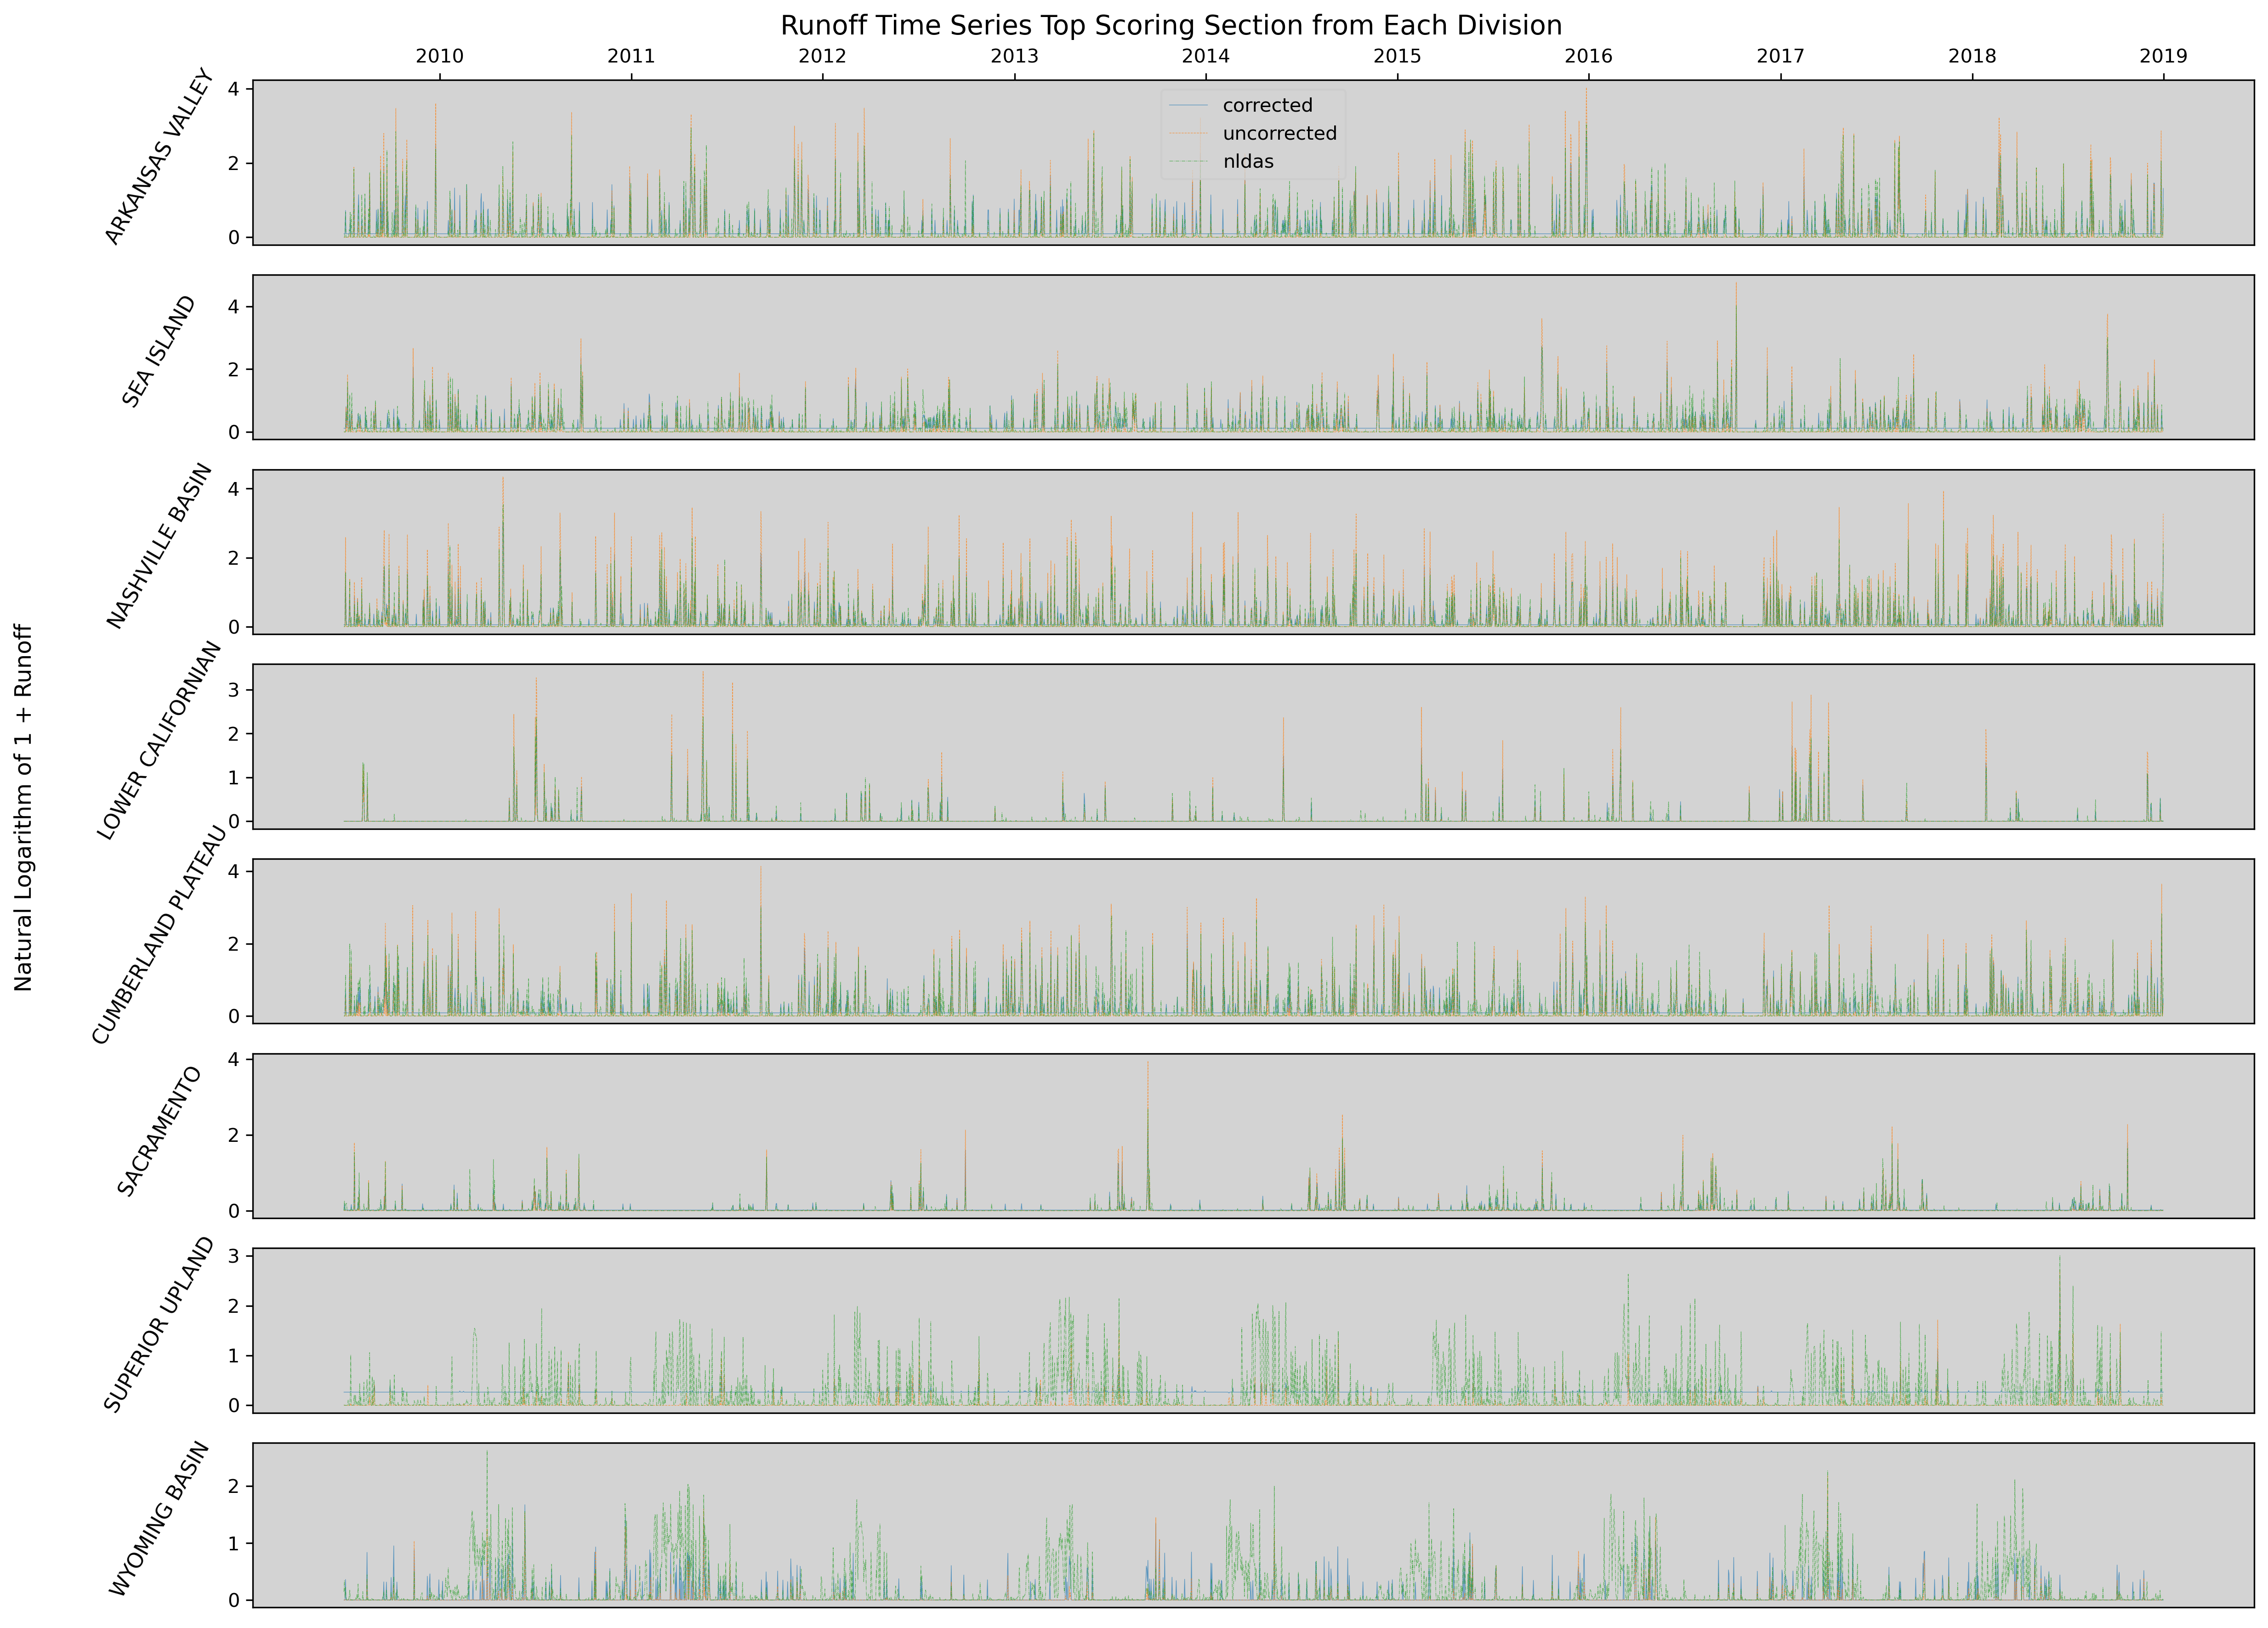

In [14]:
mct.plotCorrectionRunoffComparison(sort=False)

In [15]:
keys=list(mct.best_modelg_runoff_dict.keys())
(mct.best_modelg_runoff_dict[keys[0]]['uncorrected']-mct.best_modelg_runoff_dict[keys[0]]['uncorrected']).sum()

cn    0.0
dtype: float64

In [16]:
mct.saveCorrectionSelectionTable()

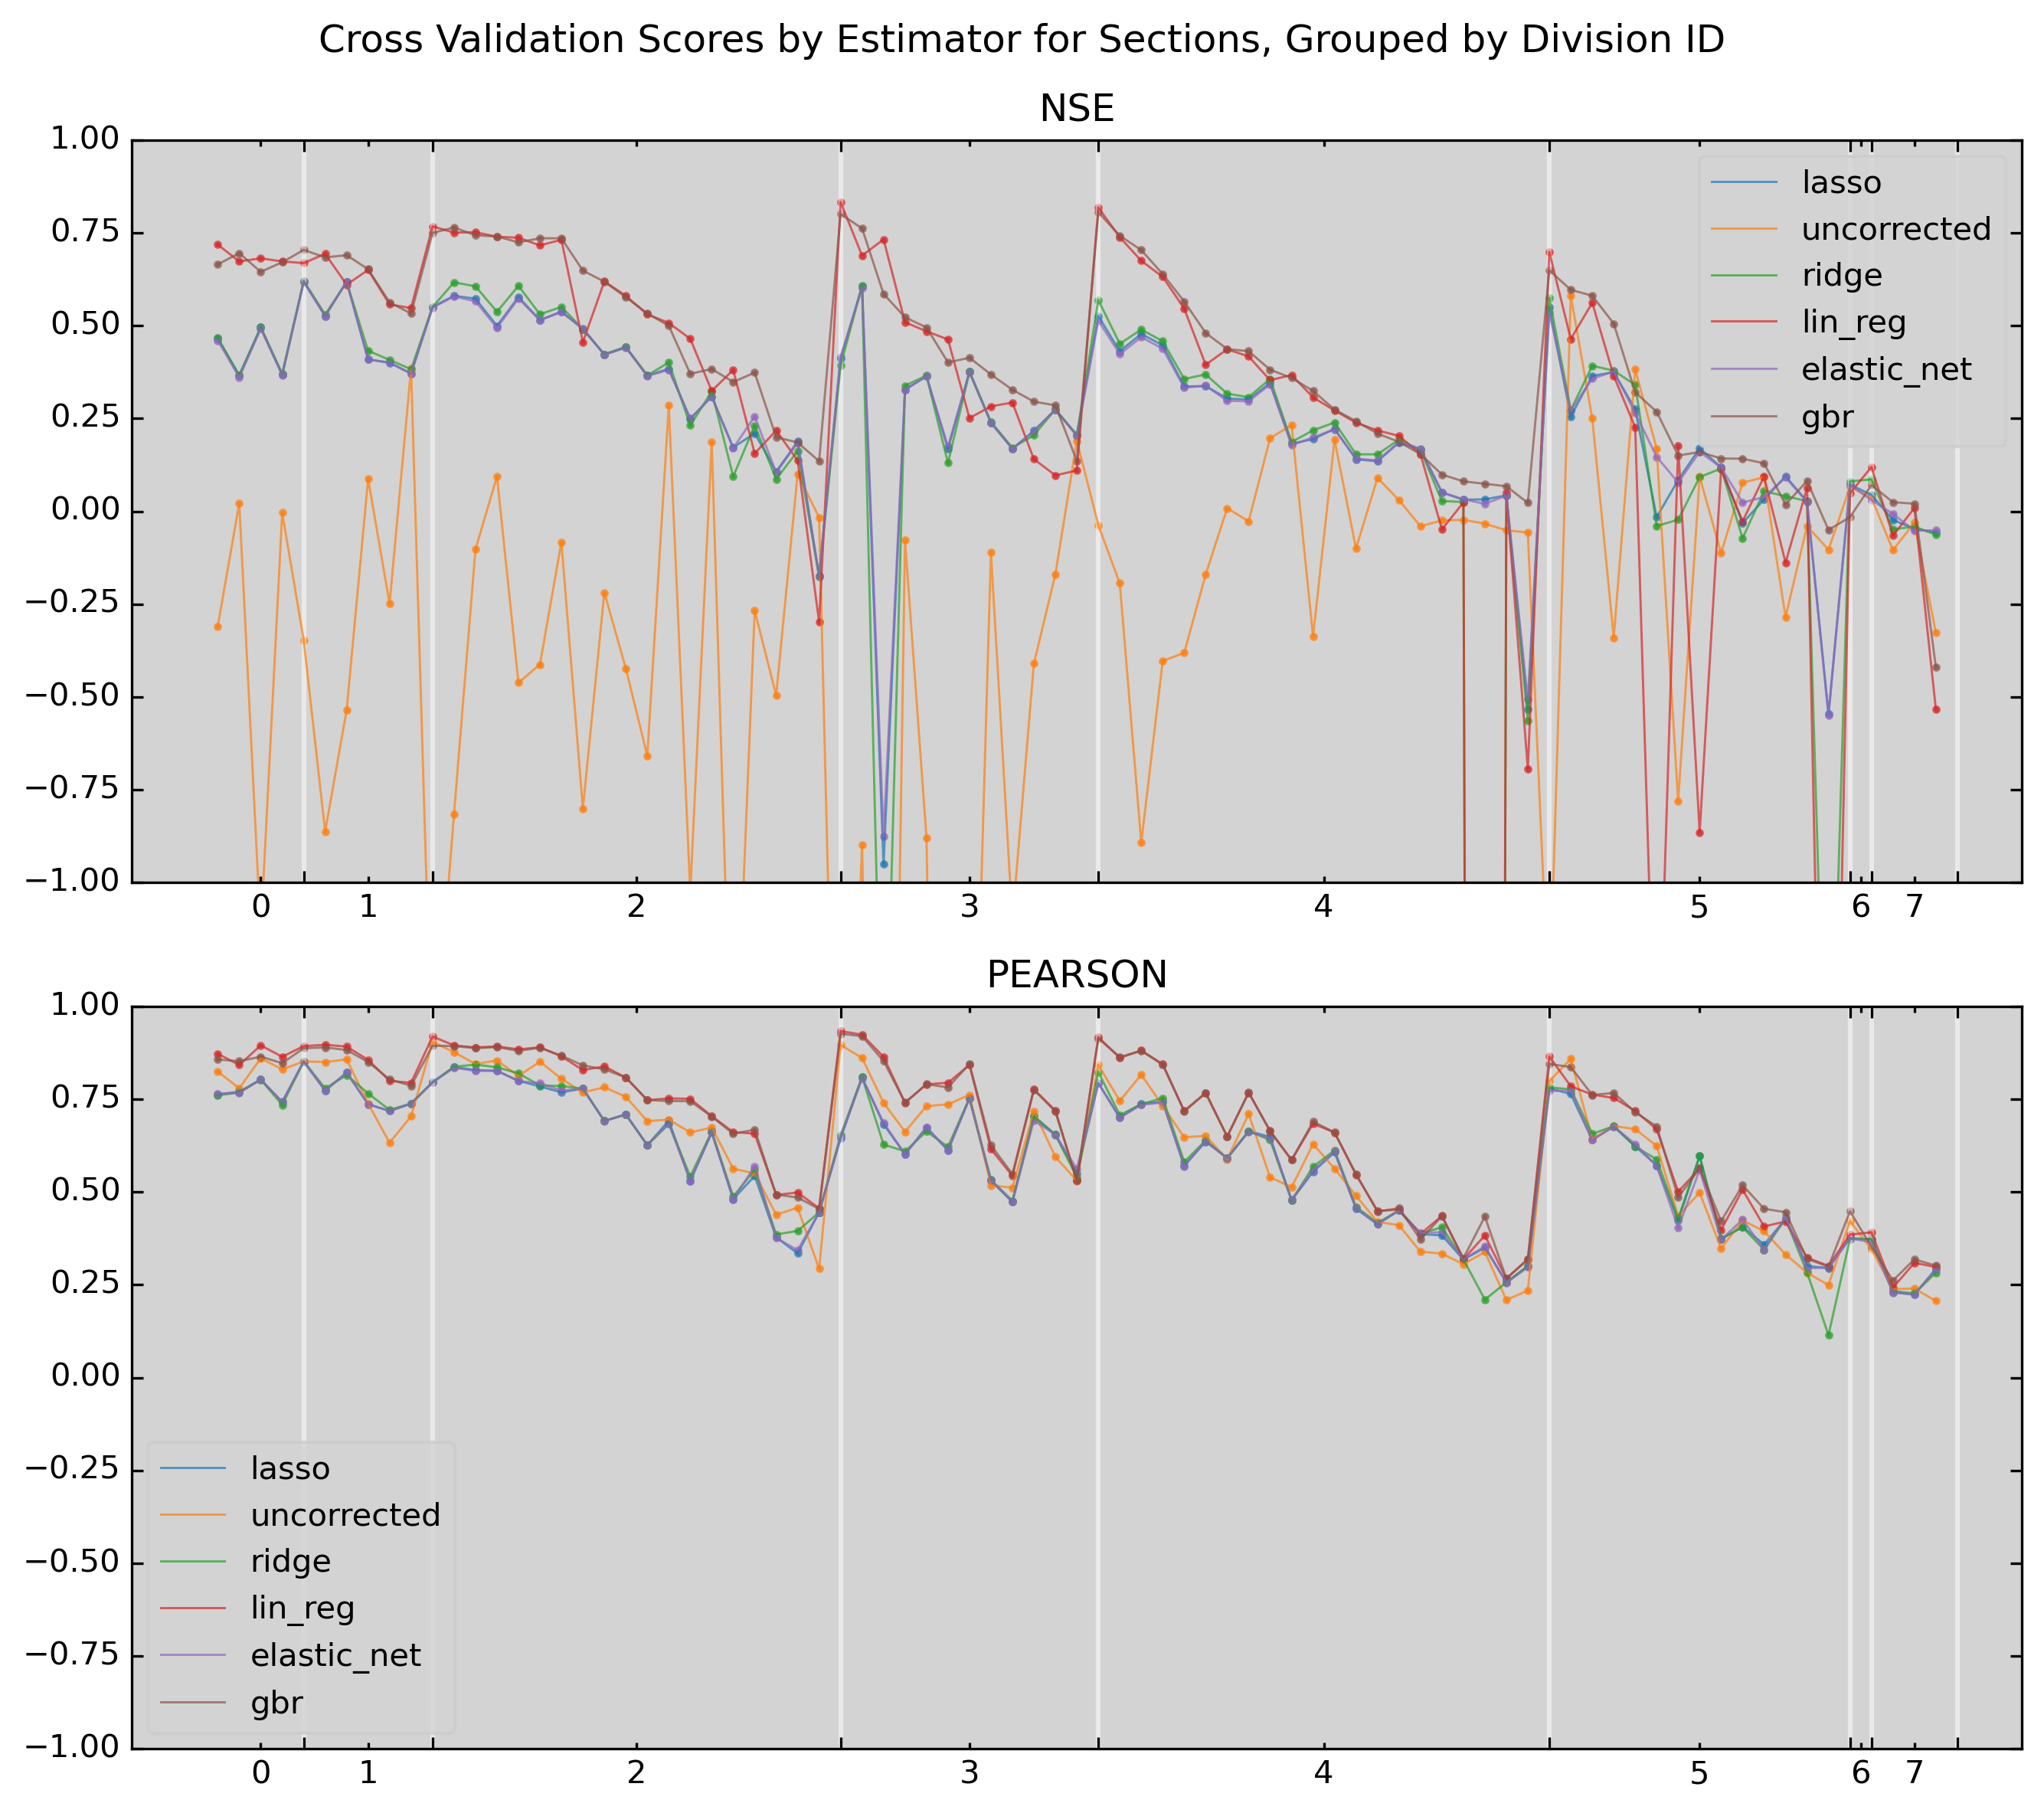

In [17]:
mct.plotCorrectionResultLines()

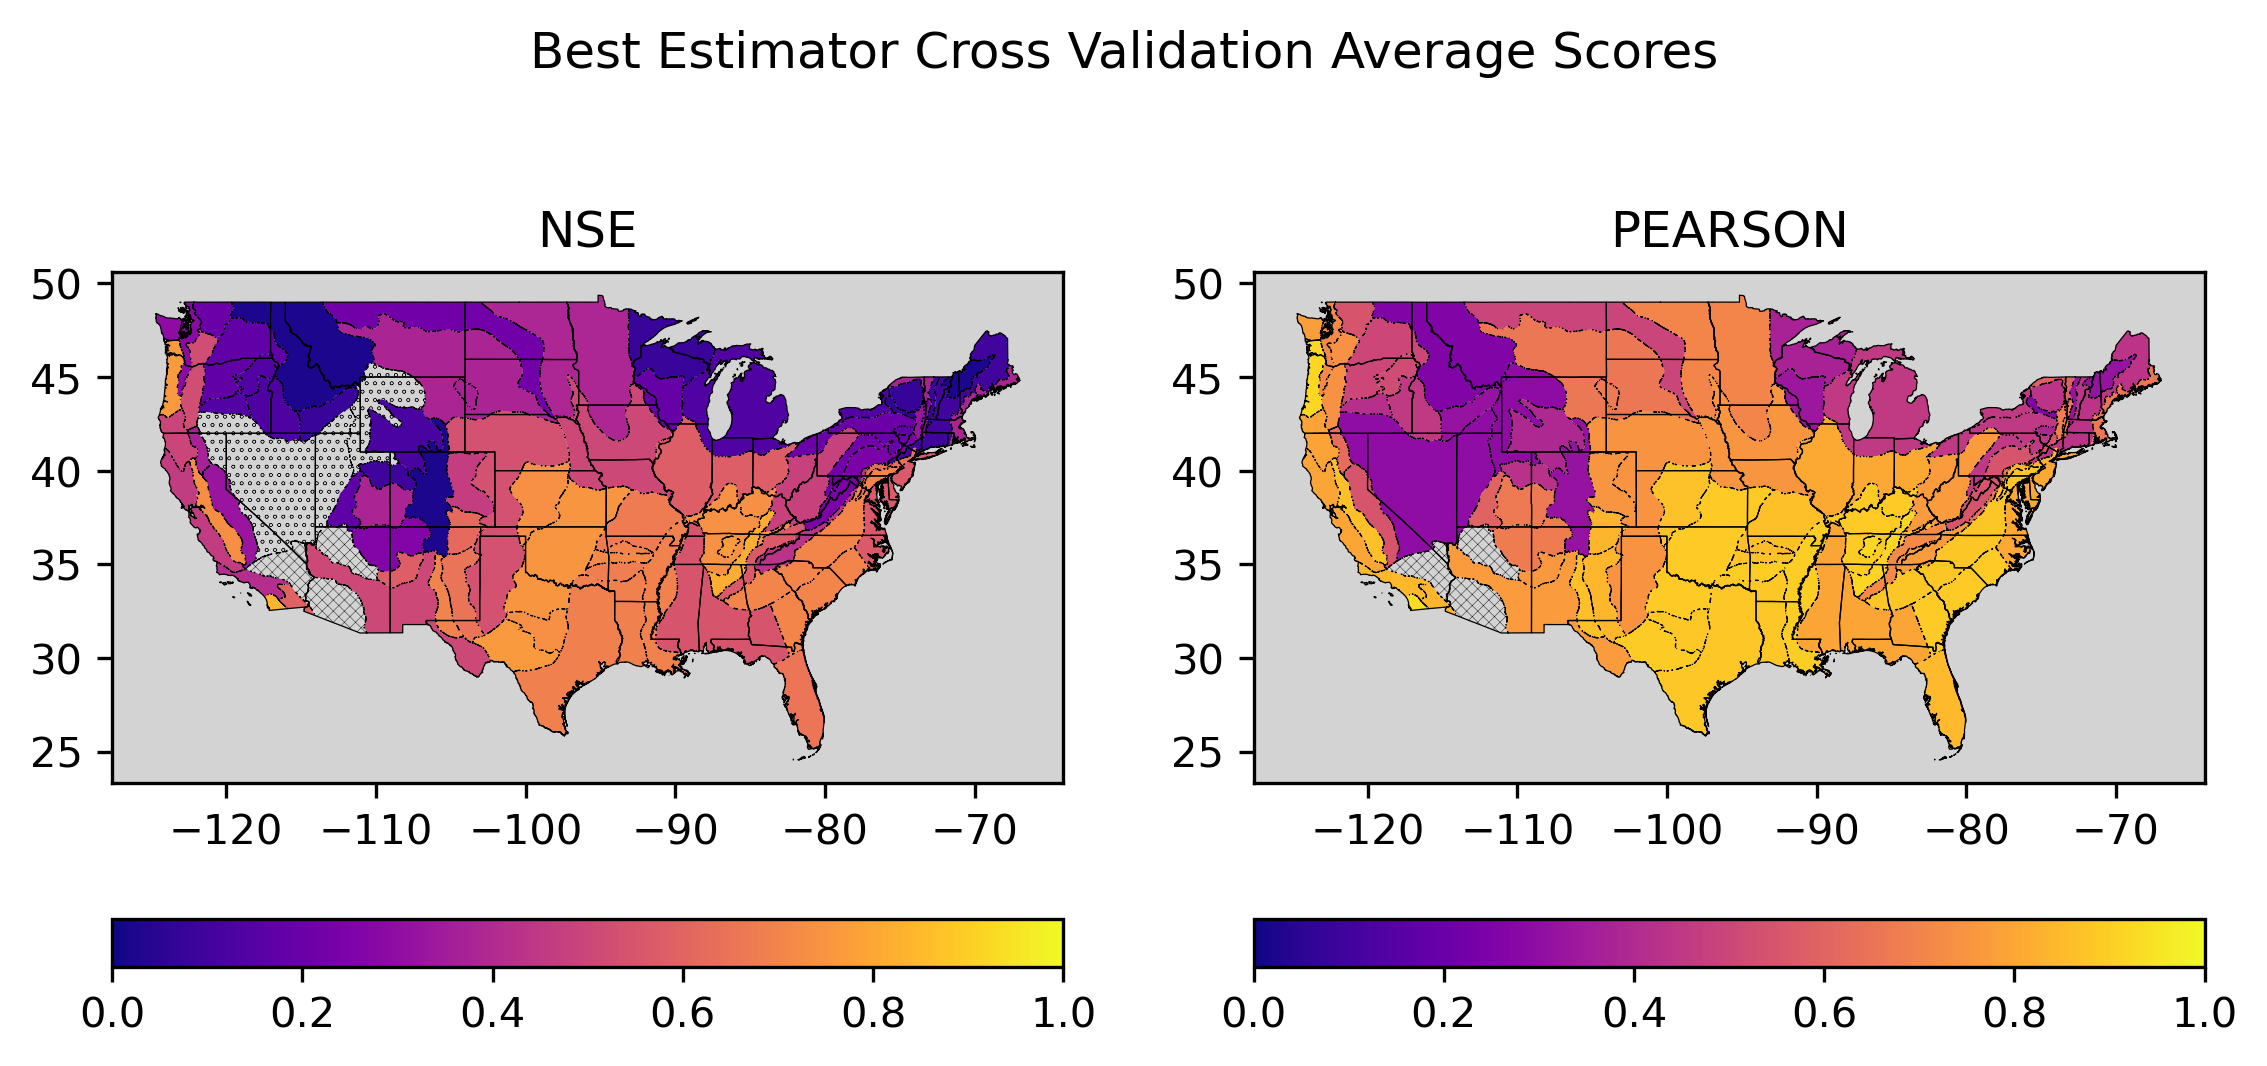

In [18]:
mct.plotGeogHybridAccuracy(plot_negative=False)

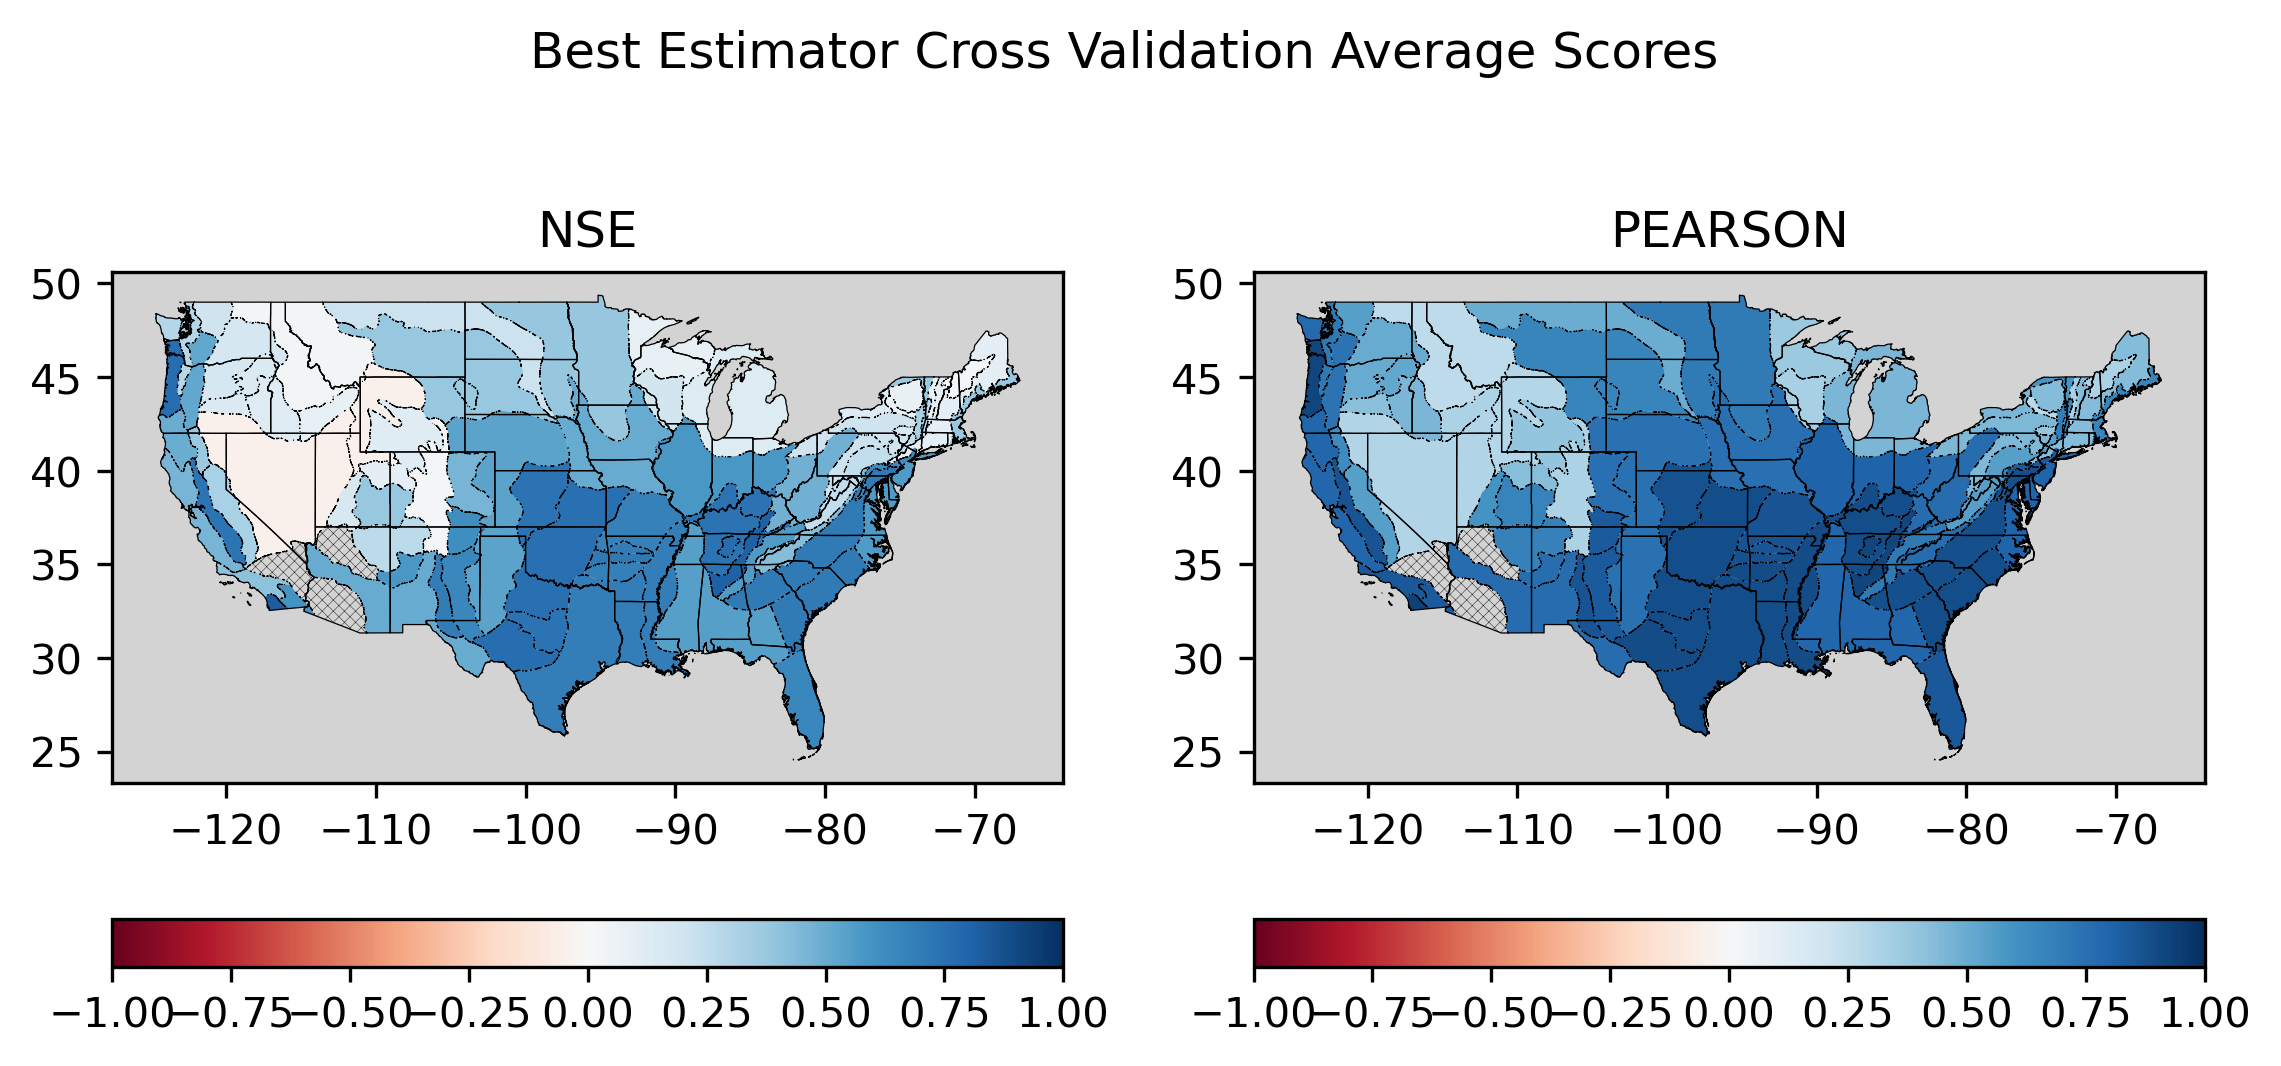

In [19]:
mct.plotGeogHybridAccuracy(plot_negative=True)

In [20]:
print(*list(np.arange(5)))

0 1 2 3 4
